In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston

boston = load_boston()
california = fetch_california_housing()

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.stats import norm

import math

%matplotlib inline

In [23]:
#inspired in R dataframe render data vectors

dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


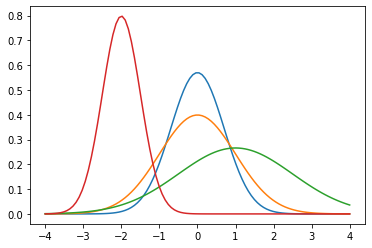

In [24]:
#PDF probability density function 
#mlab.normpdf is deprycated

x=np.linspace(-4,4,100) 
for mean,variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    plt.plot(x, norm.pdf(x,mean,variance)) 
plt.show()


In [26]:
#pandas DataFrame method
#mean calculation
mean_expected_value = dataset['target'].mean()
mean_expected_value

22.532806324110698

In [27]:
#numpy method
np.mean(dataset['target'])

22.532806324110698

In [28]:
#measuring	the	error	produced	in	predicting	the	real	y values
#squared sum of errors
squared_errors = pd.Series(mean_expected_value - dataset['target'])**2
SSE = np.sum(squared_errors)
print('Sum of Squared Errors SSE: %01.f'% SSE)

Sum of Squared Errors SSE: 42716


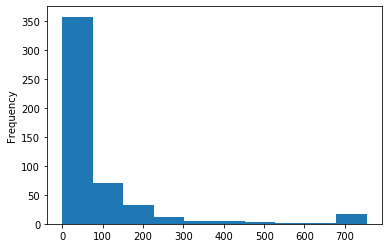

In [29]:
density_plot = squared_errors.plot('hist')

#plot shows  hpw frequent certain errors are in respect to their values, there is a high density around 0

In [ ]:
#The	formula	for	standardizing	a	variable	is	as	follows:

def standardize(x):
    return (x-np.mean(x)/np.std(x))